# Project: Investigate a Dataset [No_Show_Appointments] 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#asking">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limit">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Data of Columns Dictionary 
> PatientId : Identification of a patient.

> AppointmentId : Identification of each appointment.

> Gender : Male or Female.

> ScheduledDay : The day someone called or registered the appointment.

> AppointmentDay : The day of the actuall appointment.

> Age : How old is the patient.

> Neighbourhood : Where the appointment takes place.

> Scholarship : if the patient enrolled in a scholarship or not (zero or one).

> Hipertension : if the patient suffer from Hipertension or not (zero or one).

> Diabetes : if the patient suffer from Diabetes or not (zero or one).

> Alcoholism : if the patient has Alcoholic problems (zero or one).

> Handcap : if the patient is Handicap or not, and how many Handicap condition (zero or one).

> SMS_received : if the patient received a reminder sms for the appointment (zero or one).

> No-show : the most important variable does the patient did show up for his appointment or not (yes or no).

<a id='asking'></a>
## Asking Questions
> Q1 : What factors are important for us to know in order to predict if a patient will
show up for their scheduled appointment?


In [141]:
# Import Libraries for work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### 1- Load Data

In [142]:
# Read CSV File
df = pd.read_csv('no_show_appointments.csv')

In [143]:
# Print first ten rows in table
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### 2- Assessing and Building Intuition

In [144]:
# Find the shape of data
df.shape

(110527, 14)

In [145]:
# Find the datatypes of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [146]:
# Summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [150]:
# This returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [78]:
# Find the sum of duplicated rows
df.duplicated().sum()

0

#### After completing this step (Assessing and build Intuition), it can be concluded that : 
###### i- This data set contains 110527 samples (rows) and 14 columns.
###### ii- The datatype of PatientId & AppointmentId must be String (str) since they don't have any numeric usability.
###### iii- The data set has no missing values.
###### iv- The data set has no duplicated rows.
###### v- The minimum value of age is minus one (less than zero), It's wrong and mut be dropped.

### 3- Cleaning

In [79]:
# Function be used
def drop_columns(df,columns_list):
    df.drop(index = columns_list, inplace = True)

In [80]:
# Change the datatype of PatientId from float to drop .0 and change it to String (str)
df['PatientId'] = df['PatientId'].astype('Int64') # float => int
df['PatientId'] = df['PatientId'].astype(str)

In [81]:
# Change the datatype of AppointmentId from int to str
df['AppointmentID'] = df['AppointmentID'].astype(str)

In [82]:
# Change the type of ScheduledDay to datatime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

In [83]:
# Change the type of AppointmentDay to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [84]:
# Find the index of samples which record of age is less than zero
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943000000000,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [85]:
df = df.drop(index = 99832)

In [86]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [87]:
# Add Weekday Column to check if there is a specific day of the week patient doesn't Show up fot there appointment
df['WeekDay'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

In [88]:
# Add WaitingDay to check if longer awaiting days from schedule the appointment to the atcual day
df['WaitingDay'] = df['AppointmentDay'] - df['ScheduledDay']

In [89]:
# Apply the describe() to new column (WaitingDay)
df['WaitingDay'].describe()

count                        110526
mean     10 days 04:24:39.789370826
std      15 days 06:07:14.979140739
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: WaitingDay, dtype: object

In [90]:
# Find the index of samples which record of WaitingDay is less than zero
df[df['WaitingDay'] < '0 days']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WeekDay,WaitingDay
27033,7839270000000,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,-1 days
55226,7896290000000,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,-1 days
64175,24252300000000,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,-1 days
71533,998232000000000,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,-6 days
72362,3787480000000,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,-1 days


In [91]:
# Drop the samples which records less than zero
columns_list = df[df['WaitingDay'] < '0 days'].index
drop_columns(df,columns_list)
df['WaitingDay'] = df['WaitingDay'].dt.days.astype('int16')

In [92]:
df[df['WaitingDay'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WeekDay,WaitingDay


In [93]:
# Remove un needed columns PatientId and AppointmentID
df = df.drop(columns = ['PatientId','AppointmentID'], inplace = False)

In [94]:
df = df.reset_index(drop=True)

In [95]:
df = df[['Gender', 'Age', 'ScheduledDay',
       'AppointmentDay', 'WeekDay', 'WaitingDay', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]

### After this Step (Cleaning Step) we check the dataset

In [96]:
df.head(10)

,Gender,Age,ScheduledDay,AppointmentDay,WeekDay,WaitingDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,2016-04-29,2016-04-29,Friday,0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,2016-04-29,2016-04-29,Friday,0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,2016-04-29,2016-04-29,Friday,0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,2016-04-29,2016-04-29,Friday,0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,2016-04-29,2016-04-29,Friday,0,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,2016-04-27,2016-04-29,Friday,2,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,2016-04-27,2016-04-29,Friday,2,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,2016-04-27,2016-04-29,Friday,2,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,2016-04-29,2016-04-29,Friday,0,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,2016-04-27,2016-04-29,Friday,2,CONQUISTA,0,0,0,0,0,0,No


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110521 non-null  object
 1   Age             110521 non-null  int64 
 2   ScheduledDay    110521 non-null  object
 3   AppointmentDay  110521 non-null  object
 4   WeekDay         110521 non-null  object
 5   WaitingDay      110521 non-null  int16 
 6   Neighbourhood   110521 non-null  object
 7   Scholarship     110521 non-null  int64 
 8   Hipertension    110521 non-null  int64 
 9   Diabetes        110521 non-null  int64 
 10  Alcoholism      110521 non-null  int64 
 11  Handcap         110521 non-null  int64 
 12  SMS_received    110521 non-null  int64 
 13  No-show         110521 non-null  object
dtypes: int16(1), int64(7), object(6)
memory usage: 11.2+ MB


In [98]:
df.shape

(110521, 14)

In [99]:
df.describe()

,Age,WaitingDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,10.184345,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043
std,23.109885,15.255153,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,179.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [100]:
# Function to be used
def plot_hist(df, x_var = '\nVariable\n'):
    df.hist(figsize = (10,10))
    plt.title('Value Counts for {}'.format(x_var))
    plt.xlabel(xlabel=x_var, fontsize = 12,  weight = "bold")
    plt.ylabel('\nCount\n', fontsize = 12,  weight = "bold");

In [101]:
# Fuction be used
def plot_bar(df, xvar, normalize=True, rot=0, kind='bar', figsize=(14,6), log=False):
    df['No-show'].groupby(df[xvar]).value_counts(normalize=normalize).unstack('No-show').plot(kind=kind, rot=rot,
    width=0.8, figsize=figsize, log=log, edgecolor='black')
    # Add title and format it
    plt.title("Show/No show for {}".format(xvar).title(), fontsize = 16, weight = "bold")
    # Add x label and format it
    plt.xlabel(xvar.title(),fontsize = 12, weight = "bold")
    # Add y label and format it
    plt.ylabel("Frequency".title(),fontsize = 12, weight = "bold")

#### Gender Column

In [102]:
df['Gender'].value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

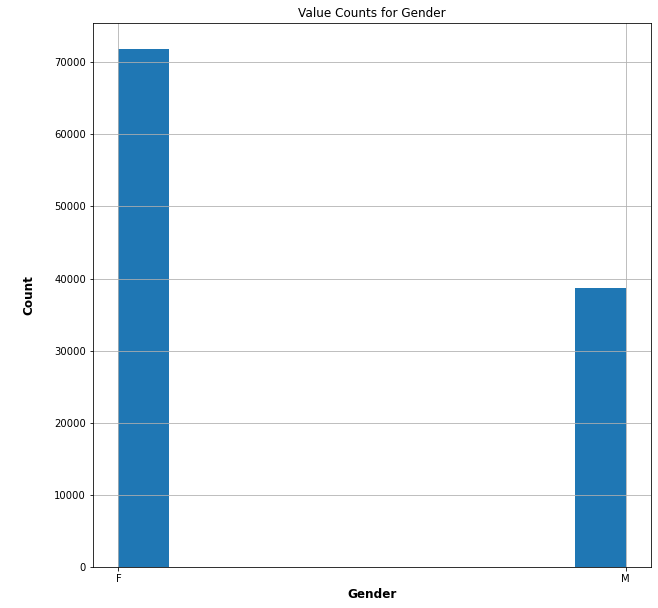

In [103]:
plot_hist(df['Gender'], 'Gender')

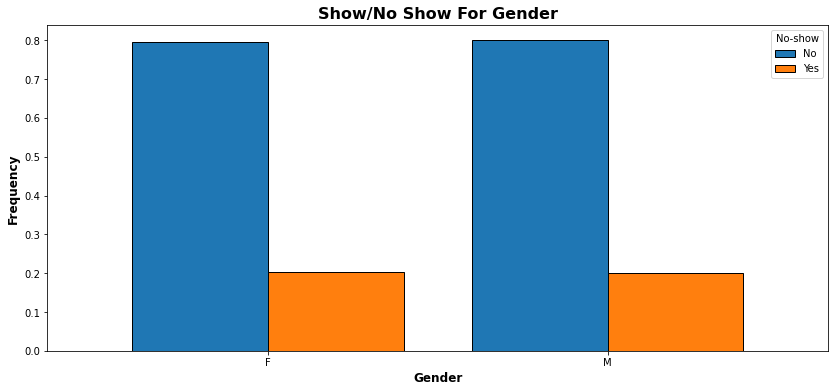

In [104]:
plot_bar(df, 'Gender')

#### Both Females and Males have the same freq. of 0.2 for not showing up. So, Gender is not significant patameter for the probability of Show/No Show.

#### Age Column

In [105]:
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

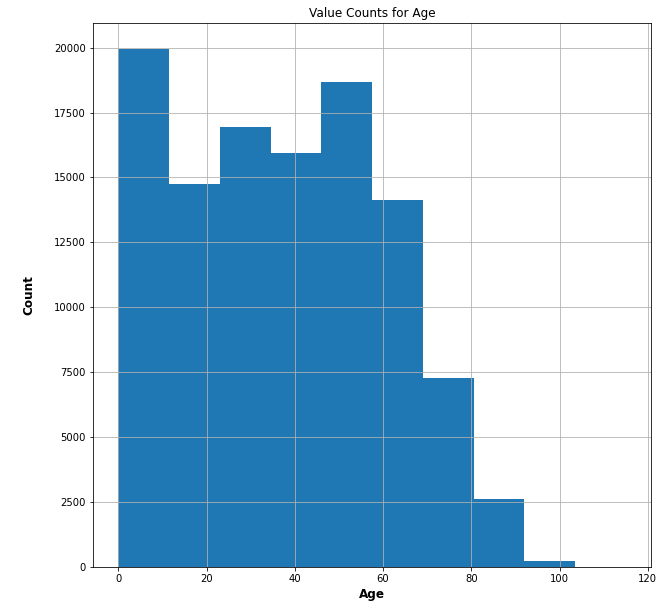

In [106]:
plot_hist(df['Age'], 'Age')

In [107]:
df['Age'].nunique()

103

In [108]:
# Convert Age into Age Groups 
ages = [0, 13, 19, 60, 116]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=ages, labels=labels, include_lowest= True, right= False)

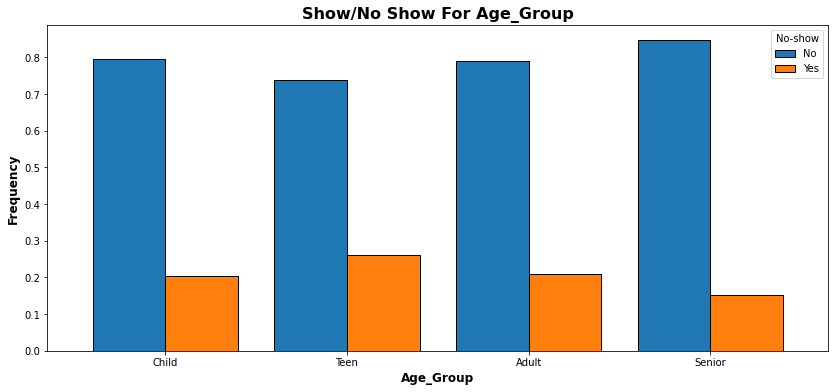

In [109]:
plot_bar(df,'Age_Group')

#### Teen Age has the most probability of not showing up.
#### Senior Age has the most probability of showing up.

#### WeekDay Column

In [110]:
df['WeekDay'].value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: WeekDay, dtype: int64

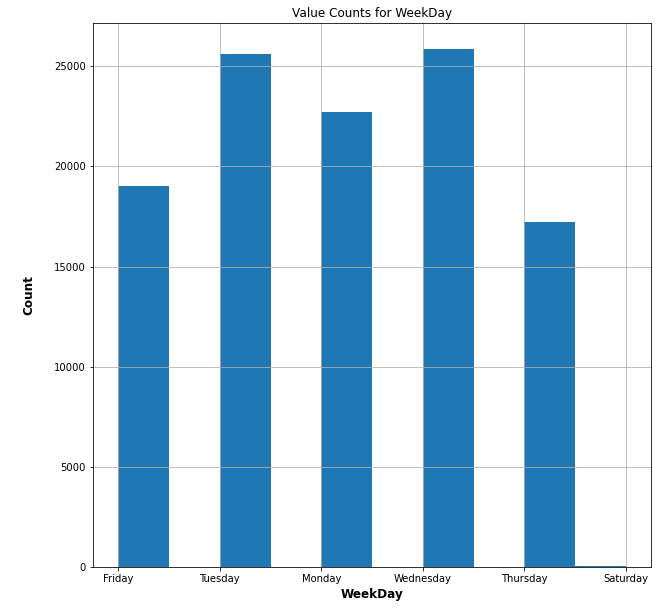

In [111]:
plot_hist(df['WeekDay'], 'WeekDay')

#### The Most busy days are Wednesday, Tuesday and Friday (Mid Week days).
#### The Least busy day is Saturday.
#### No appointments made on Sunday.

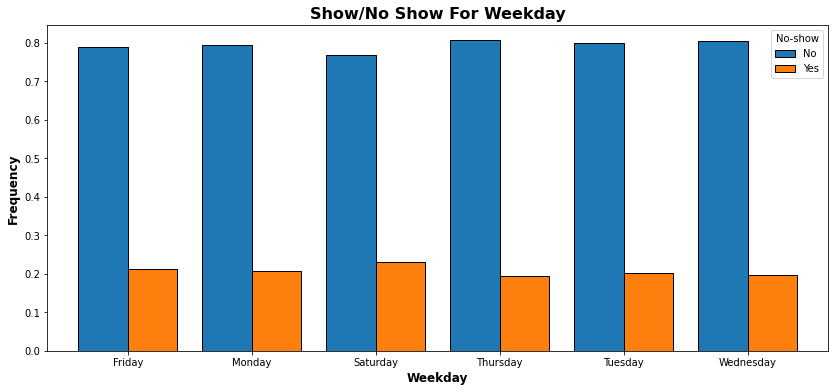

In [112]:
plot_bar(df,'WeekDay')

#### The most probability of No Show is on Saturday.

#### WaitingDay Column

In [113]:
df['WaitingDay'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDay, dtype: float64

In [114]:
# Will devide the awaiting days into intervals
bins = [0,1,4,8,15,22,31,170]
labels = ['Same day', '[1 - 3 days]', '[4 - 7 days]', '[8 - 14 days]', '[15 - 21. days]', '[22 - 30 days]', 'Month+']
df['WaitingDaysIntervals'] = pd.cut(df['WaitingDay'], bins=bins, labels=labels, include_lowest=True, right=False)

In [115]:
df['WaitingDaysIntervals'].value_counts()

Same day           38562
[4 - 7 days]       17510
[1 - 3 days]       14675
[8 - 14 days]      12025
Month+             10352
[15 - 21. days]     8874
[22 - 30 days]      8497
Name: WaitingDaysIntervals, dtype: int64

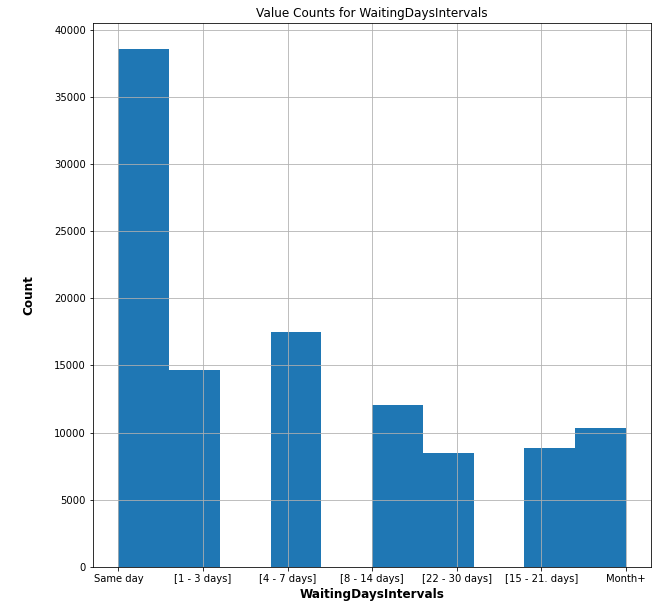

In [116]:
plot_hist(df['WaitingDaysIntervals'], 'WaitingDaysIntervals')

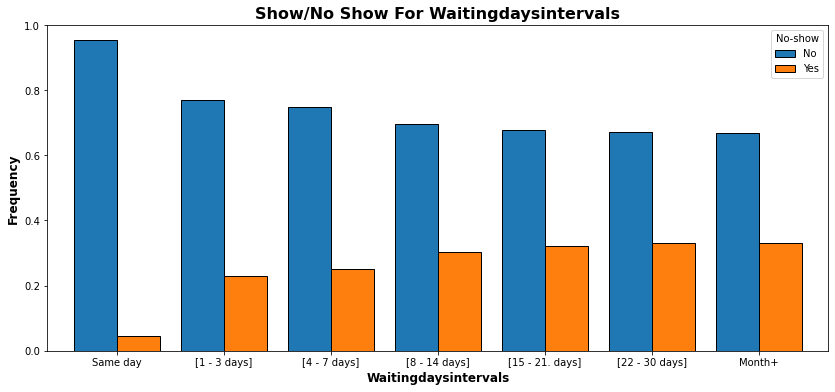

In [117]:
plot_bar(df,'WaitingDaysIntervals')

#### The more awaiting days the more probability of No Show

#### Neighbourhood Column

In [118]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

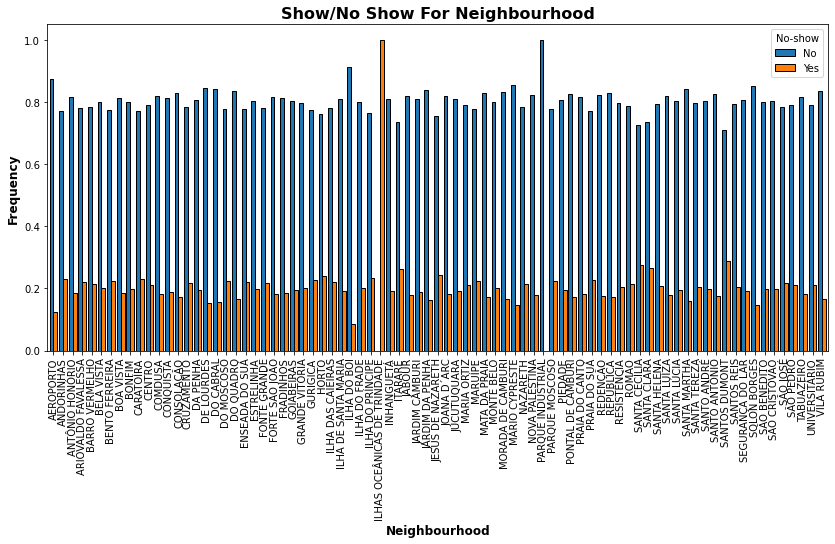

In [119]:
plot_bar(df,'Neighbourhood', rot=90)

#### Scholarship Column

In [120]:
df['Scholarship'].value_counts()

0    99660
1    10861
Name: Scholarship, dtype: int64

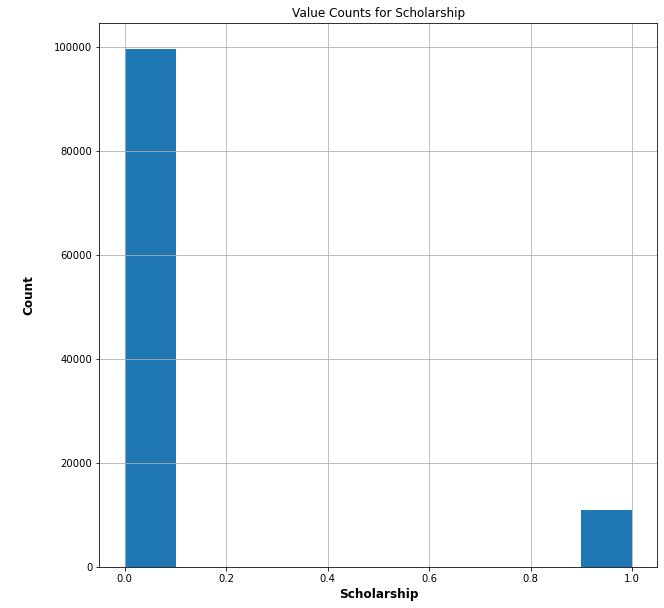

In [121]:
plot_hist(df['Scholarship'],'Scholarship')

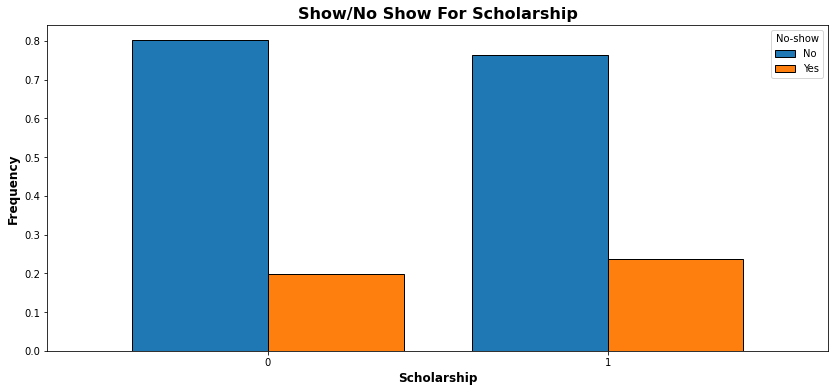

In [122]:
plot_bar(df,'Scholarship')

#### The probability of No Show increase for poor people(without scholarship).

#### Hipertension  Column

In [123]:
df['Hipertension'].value_counts()

0    88720
1    21801
Name: Hipertension, dtype: int64

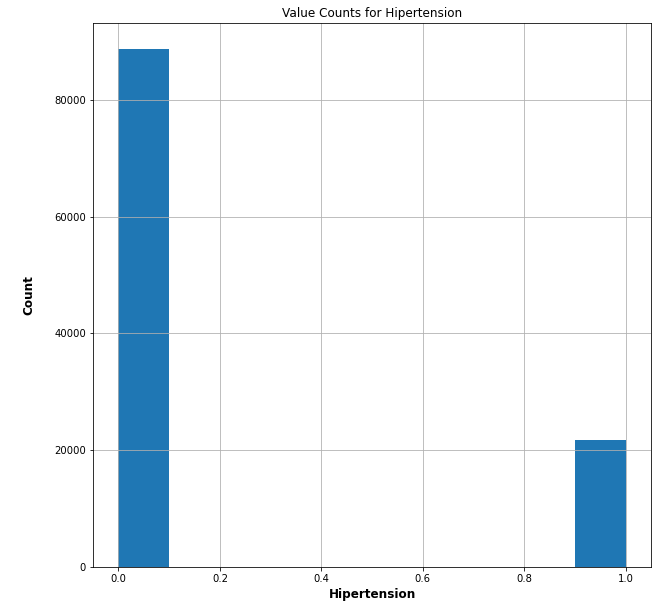

In [124]:
plot_hist(df['Hipertension'], 'Hipertension')

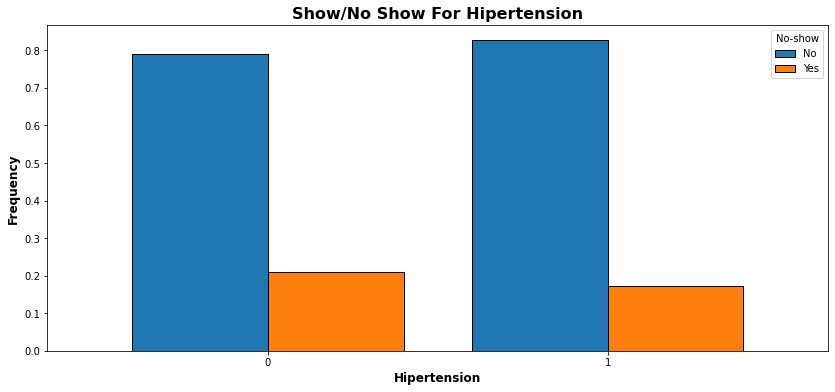

In [125]:
plot_bar(df, 'Hipertension')

#### The probability of No Show decrease for patient with Hipertension.

#### Diabetes  Column

In [126]:
df['Diabetes'].value_counts()

0    102578
1      7943
Name: Diabetes, dtype: int64

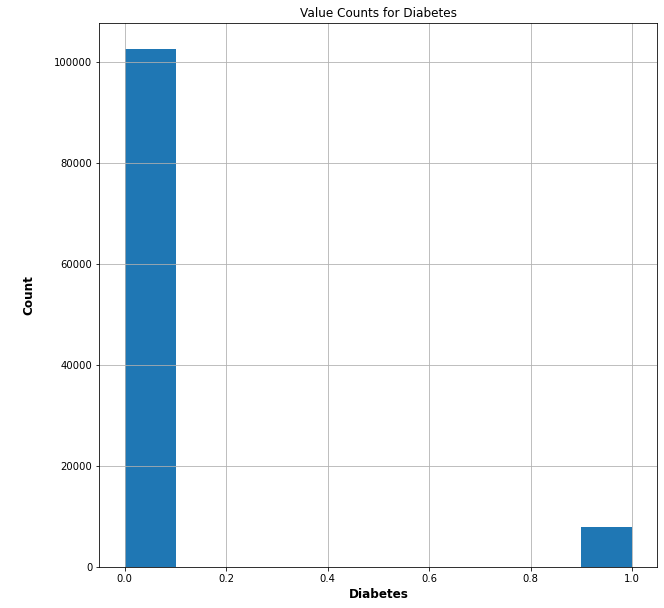

In [127]:
plot_hist(df['Diabetes'], 'Diabetes')

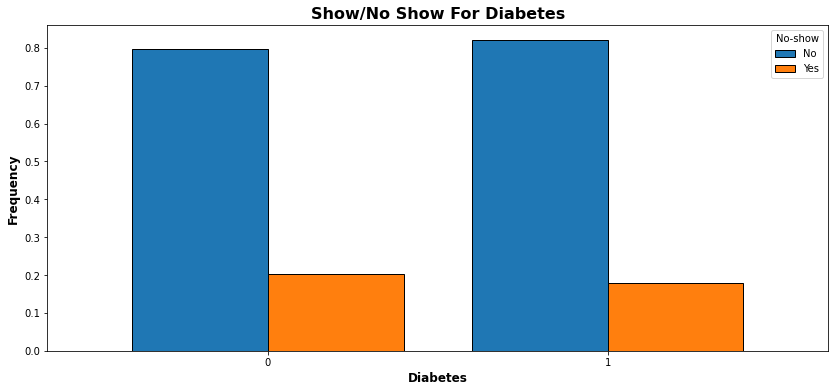

In [128]:
plot_bar(df, 'Diabetes')

#### The probability of No Show decrease for patient with Diabetes.

#### Alcoholism Column

In [129]:
df['Alcoholism'].value_counts()

0    107161
1      3360
Name: Alcoholism, dtype: int64

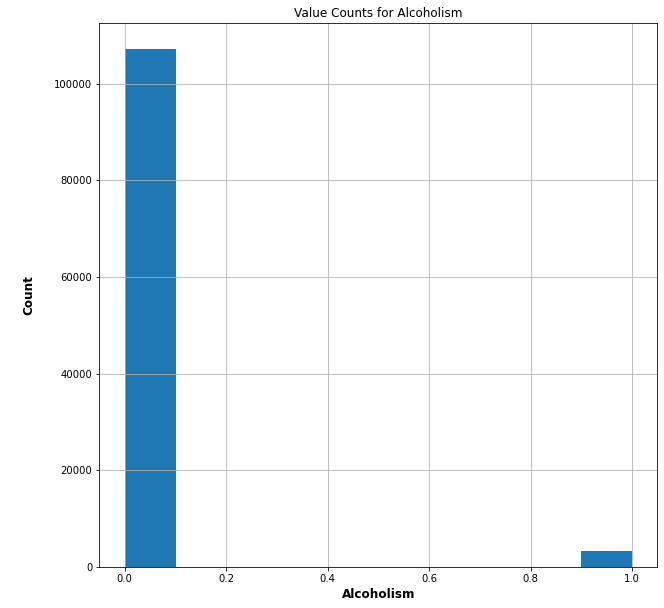

In [130]:
plot_hist(df['Alcoholism'], 'Alcoholism')

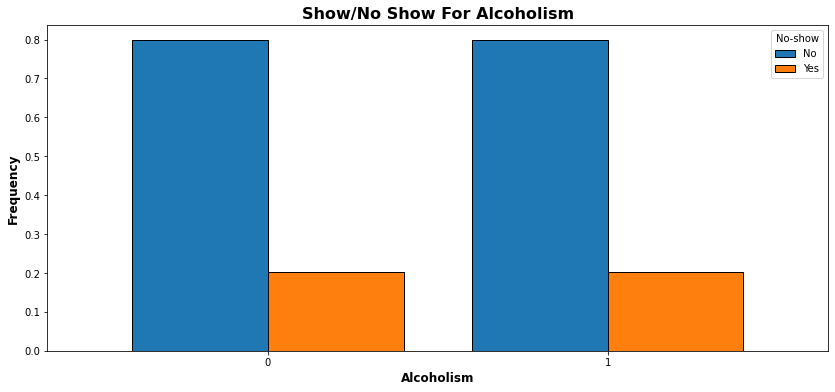

In [131]:
plot_bar(df, 'Alcoholism')

#### Alcoholism patients and None Alcoholism patients have the same probability of Show/No Show.

#### Handcap Column

In [132]:
df['Handcap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

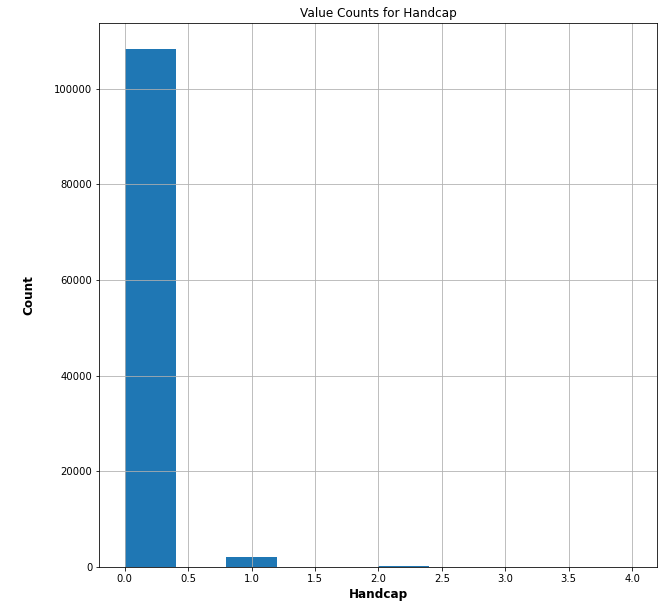

In [133]:
plot_hist(df['Handcap'], 'Handcap')

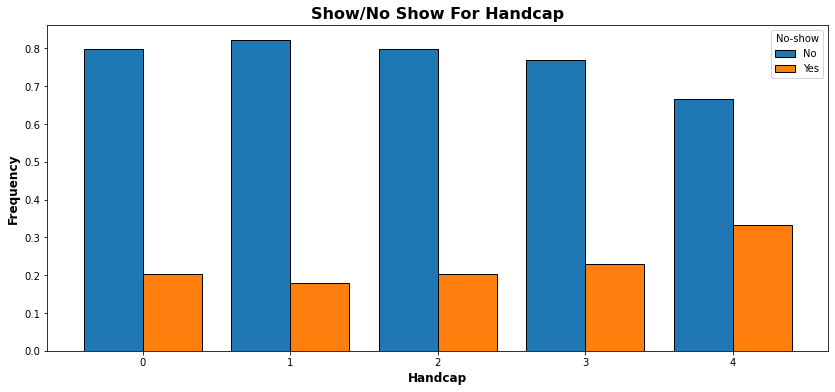

In [134]:
plot_bar(df, 'Handcap')

#### SMS_received Column

In [135]:
df['SMS_received'].value_counts()

0    75039
1    35482
Name: SMS_received, dtype: int64

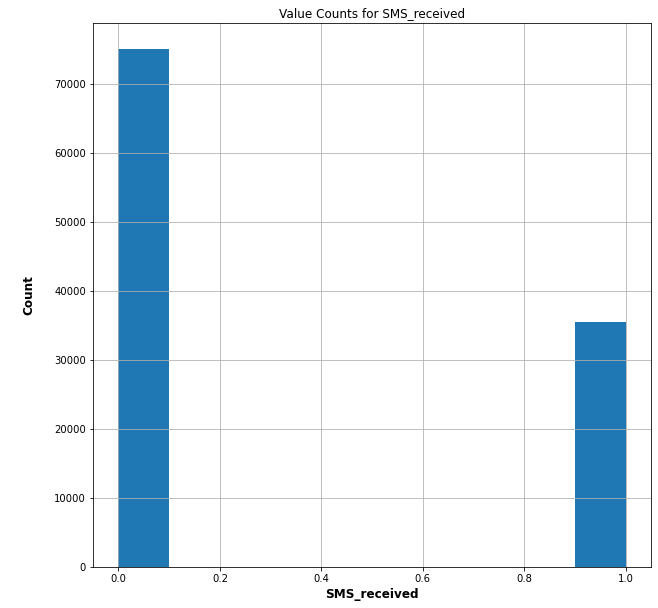

In [136]:
plot_hist(df['SMS_received'], 'SMS_received')

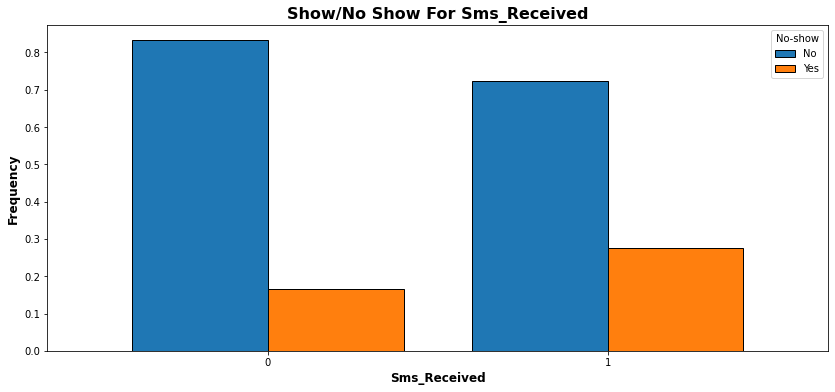

In [137]:
plot_bar(df, 'SMS_received')

#### since most of No Show patients did receive an SMS, SMS_Received has no effect on the probabilty of Show/No Show

<a id='limit'></a>
## Limitations

### (1) This analysis does not represent an analysis of the people of the entire state of Brazil, because the analysis was carried out on a very simple sample of the state of Brazil, the proportion of this sample of the population does not exceed 0.03%.

### (2) The dataset didn't tell us the distance between the patient's homes and hospitals, where this factor (Distance between hospitals and homes) is one of the factors that may effect on the analysis.

### (3) Some unrealistic data was dropped from the data set like Negative Age and Appointment Date prior to schedule Date.

<a id='conclusions'></a>
## Conclusion

### (1) PatientId and AppointmentID has no effect on Show/No Show of the patient.
### (2) Gender is not significant variable for the probability of Show/No Show.
### (3) Age Group is a significant variable for the probabilty of Show/No Show.
### (4) The probability of attending appointment decreases during Weekends (Saturday & Friday).
### (5) The Awaiting Days is a great significant variable for the probabilty of Show/No Show.
### (6) Neighbourhood Variable is not significant for the probabilty of Show/No Show.
### (7) Scholarship is important factor in predicting if a patient will show up for their scheduled appointment or not.
### (8) The probabitity of attending appointment increases when patient have Hipertension.
### (9) The probabitity of attending appointments increases when the patient have Diabetes.
### (10) The Alcoholism variable is not significant for the probabilty of Show/No Show.
### (11) The probability of attending appointment decreases when patient have three or four Handcap condition.
### (12) SMS_Received Variable is not significant for the probabilty of Show/No Show.

## So we can answer on the question (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?), The factors are Age, WeekDay, WaitingDay, Scholarship, Hipertension, Diabetes, Alcoholism, and Handcap.